In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import interpolate

from data_loader import DataLoader

In [2]:
data_loader = DataLoader()
data_train = data_loader.get_processed_data('datasets\\no1_train.csv')
cols_to_use=["hydro", "micro", "thermal", "wind", "river", "total", "sys_reg", "flow", "y_yesterday", "y_prev", "cos_minute", "sin_minute","cos_weekday", "sin_weekday", "cos_yearday", "sin_yearday", "struct_imbal"]
train_x, train_y = DataLoader.strip_and_format_data(data_train, cols_to_use, 'y', 288, 144, False)

In [7]:
data_train.iloc[288+143]

start_time             2019-01-11 02:05:00
hydro                            -0.498268
micro                            -0.575716
thermal                          -0.105058
wind                             -0.251568
river                                 -1.0
total                            -0.497644
y                                -0.319476
sys_reg                           0.271889
flow                             -0.248763
load                               4666.34
struct_imbal                     -0.145134
y_with_struct_imbal              -0.319476
y_original                       64.239148
y_yesterday                      -0.244568
y_prev                           -0.305214
hour_of_day                              2
min_of_day                             125
cos_minute                        0.853924
sin_minute                        0.520397
day_of_week                              4
cos_weekday                           -0.5
sin_weekday                          -0.87
day_of_year

In [9]:
data_train.iloc[288:300].drop(columns=['cos_minute', 'sin_minute', 'hour_of_day',	'min_of_day',	'day_of_week',	'cos_weekday',	'sin_weekday'])

,start_time,hydro,micro,thermal,wind,river,total,y,sys_reg,flow,...,struct_imbal,y_with_struct_imbal,y_original,y_yesterday,y_prev,day_of_year,cos_yearday,sin_yearday,date,daily_mean
288,2019-01-10 14:10:00,0.191042,-0.567966,-0.105058,-0.281682,-1.0,0.137997,-0.075570,0.271889,-0.583437,...,-0.060082,-0.075570,374.887951,-0.101918,-0.074404,10,0.98524,0.171177,2019-01-10,-0.235974
289,2019-01-10 14:15:00,0.191042,-0.567966,-0.105058,-0.281682,-1.0,0.137997,-0.080538,0.271889,-0.583437,...,-0.077058,-0.080538,368.561429,-0.110724,-0.075570,10,0.98524,0.171177,2019-01-10,-0.235974
290,2019-01-10 14:20:00,0.191042,-0.567966,-0.105058,-0.281682,-1.0,0.137997,-0.083400,0.271889,-0.583437,...,-0.096320,-0.083400,364.915513,-0.115621,-0.080538,10,0.98524,0.171177,2019-01-10,-0.235974
291,2019-01-10 14:25:00,0.191042,-0.567966,-0.105058,-0.281682,-1.0,0.137997,-0.104558,0.271889,-0.583437,...,-0.118129,-0.104558,337.967473,-0.137165,-0.083400,10,0.98524,0.171177,2019-01-10,-0.235974
292,2019-01-10 14:30:00,0.191042,-0.567966,-0.105058,-0.281682,-1.0,0.137997,-0.113847,0.271889,-0.583437,...,-0.142746,-0.113847,326.137265,-0.158632,-0.104558,10,0.98524,0.171177,2019-01-10,-0.235974
293,2019-01-10 14:35:00,0.191042,-0.567966,-0.105058,-0.281682,-1.0,0.137997,-0.140671,0.271889,-0.583437,...,-0.170281,-0.140671,291.972908,-0.187670,-0.113847,10,0.98524,0.171177,2019-01-10,-0.235974
294,2019-01-10 14:40:00,0.191042,-0.567966,-0.105058,-0.281682,-1.0,0.137997,-0.159131,0.271889,-0.583437,...,-0.200246,-0.159131,268.461842,-0.197395,-0.140671,10,0.98524,0.171177,2019-01-10,-0.235974
295,2019-01-10 14:45:00,0.191042,-0.567966,-0.105058,-0.281682,-1.0,0.137997,-0.186346,0.271889,-0.583437,...,-0.231999,-0.186346,233.799615,-0.230583,-0.159131,10,0.98524,0.171177,2019-01-10,-0.235974
296,2019-01-10 14:50:00,0.191042,-0.567966,-0.105058,-0.281682,-1.0,0.137997,-0.200236,0.271889,-0.583437,...,-0.264900,-0.200236,216.108615,-0.244575,-0.186346,10,0.98524,0.171177,2019-01-10,-0.235974
297,2019-01-10 14:55:00,0.191042,-0.567966,-0.105058,-0.281682,-1.0,0.137997,-0.191588,0.271889,-0.589771,...,-0.238753,-0.191588,227.122187,-0.247235,-0.200236,10,0.98524,0.171177,2019-01-10,-0.235974


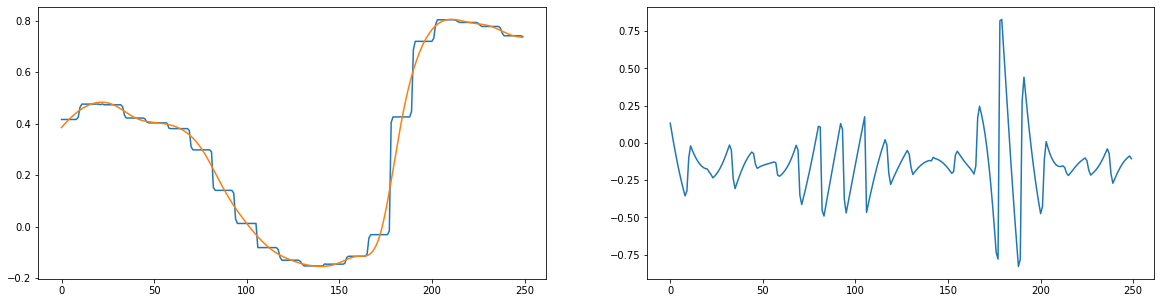

In [ ]:
data_train
offset = 0
limit = 250
data_train['load'] = data_train['total'] - data_train['flow']

minutes = np.array(pd.to_datetime(data_train['start_time'].iloc[:12]).dt.minute)
start_index = np.where(minutes==30)[0][0]

spline_load_x = np.arange(start_index, len(data_train['load']), 12)
spline_load_y = np.array(data_train['load'].iloc[spline_load_x])

load_x = np.arange(0, len(data_train['load']))

tck = interpolate.splrep(spline_load_x, spline_load_y)
demand_y = interpolate.splev(load_x, tck)

plot_start = offset
plot_end = offset + limit

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 5))
ax0.plot(load_x[plot_start:plot_end], data_train['load'][plot_start:plot_end])
ax0.plot(load_x[plot_start:plot_end], demand_y[plot_start:plot_end])

new_new_y_vals = demand_y-data_train['load']
ax1.plot(load_x[plot_start:plot_end], data_train['struct_imbal'][plot_start:plot_end])
plt.show()